In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 

In [23]:
def f(z,V,k,m,a,α):                                   
    Vt = 0.0;
    R = 1.0;
    c = 1.0;
    ################################################
    # Γt
    G = (1-4*m**2+3*z**2+4*a**2 * m**2 -8*m**2 * z**2 + 3*z**4 - 4*m**2 * z**4 + z**6)
    ###
    Γt_tr = (m*(z+2*z**3+z**5+2*m-a*m*a**2+4*m*z**2+4*m*a**2 * z**2 + 2*m*z**4))/ (z**2 * G)
    Γt_tz = (m*z*(z+2*z**3+z**5+2*m-6*m*a**2+4*m*z**2+2*m*z**4))/(z**2 * G)
    Γt_rt = Γt_tr
    Γt_rϕ = (-m*a*(z+4*m))/(G)
    Γt_ϕr = Γt_rϕ
    Γt_ϕz = (-m*a*z*(3*z+4*m))/(G)
    Γt_zt = Γt_tz
    Γt_zϕ = Γt_ϕz
    ################################################
    # Γr
    H = (z+2*m)*z**2
    ####
    Γr_tt = m/H
    Γr_tϕ = (2*m*a)/H
    Γr_rr = -m/H
    Γr_rz = -m*z/H
    Γr_ϕt = 2*m*a/H
    Γr_ϕϕ = -1*(z**3+m+2*m*z**2)/H
    Γr_zr = (-m*z)/H
    Γr_zz = m/H
#######################
    # Γϕ
    Γϕ_tz = ((a*m*z)*(-4*m+3*z))/(G)
    Γϕ_tr = (a*m*(z-2*z**3+4*m*z**2))/G
    Γϕ_zϕ = (-1*(m*z)*(z+2*z**3+z**5-2*m+6*m*a**2-4*m*z**2-2*m*z**4))/((1+z**2)*G)
    Γϕ_ϕz = -Γϕ_zϕ    
    Γϕ_ϕr = 0; #####################################
#######################
    # Γz
    L = (1+z**2)*(z+2*m)
    Γz_tt = (m*z)/(L)
    Γz_tϕ = (-1*(3*m*a*z)/(L*(1+z**2)))
    Γz_rr = (m*z)/(L)
    Γz_rz = (-m*R)/(L)
    Γz_ϕt = (-3*m*a*z*R**2)/(L*(1+z**2))
    Γz_ϕϕ = (m*z)/(L*(1+z**2))
    Γz_zr = -m/L
    Γz_zz = (-m*z)/((1+z**2)*(np.sqrt(z)+2*m))
#######################################
    Vz,Vϕ,Bϕ = V
#     Vz = 0.85
#     Vϕ = 0.52
#     Bϕ = 1e4
    γ = 1./(np.sqrt(1-(Vz**2 + Vϕ**2)))
#     print(γ)
#     if 80 <= γ <= 100:
#         print(γ)
#     else:
#         print("Boro Baba")
#     if np.isnan(γ):
#         γ = 1000
#     γ = 100;
    Uϕ = γ*Vϕ;
    U0 = γ;
    Ur = 0;
    Uz = γ*Vz;  
    gzz = -z/(z+2*m)
    Bz = 1e4
    ###############################
    ## dBϕdz
    L1 = ((z**2/(4*np.pi*(z+2*m)**2))*(((2*(Bϕ*Uz-Bz*Uϕ))) \
                                           + ((z**3 * Bz)/(2*m*a*U0))))+(1./(Vz*U0**2 * (z**-1.5 + k*z**-2.5)))
    
    
    
    L3 = (-2*Vz*Vϕ*Γt_ϕz) + (-1/(Vz*U0**2*(z**-1.5+k*z**-2.5))) \
    * (Γz_tt+2*Vϕ*Γz_tϕ-2*Γt_tz*Vz**2+Γz_ϕϕ*Vϕ**2 + Vz**2 * (Γz_zz-2*Vϕ*Γt_ϕz) \
    + gzz*(2.5*k*z**-3.5) + (Bϕ/4*np.pi)* (((4*m*z)/((z+2*m)**3)) \
       + (((z**2)/((z+2*m)**2))*(Γϕ_ϕz+Γr_zr+Γz_zz +Γt_tz)))\
    *(((z*Bϕ)/(z+2*m)) - ((Vz*Bz*z**3)/(2*m*a))))
    
    
#     L4 = ((Bϕ*(2*z**2 + 4*m*z-4*z))/(4*np.pi*(z+2*m)**3))\
#     *2*((((Bϕ*Uz - Bz*Uϕ))/(U0)) + ((Bz*z**3)/(2*m*a*U0**2))) 
    
    L4 = (1./(4*np.pi*U0))*(2*(Bϕ*Uz - Bz*Uϕ) + (z**3 * Bz)/(2*m*a*U0))
    
    
#     L5 = (2*Ur/U0)*(((Bz**2 * Γϕ_tr * z**4)/(4*np.pi * 2*m*a*(z+2*m))) \
#                      + ((z**2 * (Bz**2 + Bϕ**2))/(4*np.pi * (z+2*m)**2))\
#                      *(Γt_tr + Γr_rr + Γϕ_ϕr + Γz_rz))
    
    L5 = ((z**2 * Bϕ)/((z+2*m)**2))*(((4*m)/(z * (z+2*m))) \
                                     + (Γϕ_ϕz+Γr_zr+Γz_zz+Γt_tz))
    
    
    
    L2 = Vz*(-1.5*z**(-2.5) + 2.5*k*z**(-3.5)) + (z**-1.5 + k*z**-2.5)*(L3) - (L4*L5)
    
    dBϕdz = (L1**-1)*(L2)
######################################################################   
# dVzdz
    M2 = ((z**2)/(4*np.pi * (z+2*m)**2 )) \
    * (((Bϕ*(4*m))/(z*(z+2*m))) + dBϕdz \
       + Bϕ*(Γϕ_ϕz + Γr_zr + Γz_zz + Γt_tz))
    
    M3 = ((Bϕ*z)/(z+2*m)) - ((Vz*z**3 * Bz)/(2*m*a))
    M4 = Γz_tt+Vz**2 * (Γz_zz - 2*Vϕ*Γt_ϕz-2*Γt_tz)\
    +Vϕ*(2*Γz_tϕ+Vϕ*Γz_ϕϕ)
    
    M1 = ((z**-1.5+k*z**-2.5)*U0**2)*(M4) + gzz*(2.5*k*z**-3.5) + M2*M3
    
#     dVzdz = ((-1./(Vz*U0**2*(z**-1.5+k*z**-2.5))))*(M1)
    dVzdz = -(((Vz*U0**2*(z**-1.5+k*z**-2.5))))*(M1)
   ##################################################################3 
    # dVϕdz
    N2 = (2*(z**-1.5 + k*z**-2.5)*U0**2 * Vz)\
    *(Γϕ_tz - Vϕ * Γt_tz - Vϕ**2 * Γt_zϕ )
    
    N3 = ((z**2)/((z+2*m)**2 ))*(((Bϕ*(4*m))/(z*(z+2*m))) + dBϕdz \
       + Bϕ*(Γϕ_ϕz + Γr_zr + Γz_zz + Γt_tz))
    
    N4 = (Bz/4*np.pi)*(((Vϕ*z**3)/(2*m*a)) + (z/(z+2*m)))
    N5 = z/(z+2*m) - (z**3/(2*m*a)) + Uϕ*(Uϕ+Uz)
    N6 = (α*k*z**-2.5)*(2*Γϕ_ϕr + Γr_zr)
    print(N6)
    N1 = N2 - N3*N4 + N5*N6
    dVϕdz = (((z**-1.5 + k*z**-2.5)*Vz*U0**2)**-1)*(N1)
    
    dVdz = [dVzdz, dVϕdz,Bϕ]
    return dVdz

In [72]:
# f(r,V,k,m,a,α)
V = solve_ivp(fun=f, t_span=[6.1,60.2], y0=[0.8511,0.525,5e4],
             method='Radau', args=(0.364,1,1,1e12), dense_output=False)  
# Radau
# RK4   

-80160781.44168521
-80160781.44168493
-80160781.44168521
-80160781.44168521
-80160781.44168521
-80160781.44168055
-80160781.44166581
-80160781.44165514
-80160781.44168055
-80160781.44166581
-80160781.44165514
-80160781.44165514
-80160781.4416353
-80160781.44157249
-80160781.44152704
-80160781.4416353
-80160781.44157249
-80160781.44152704
-80160781.44152704
-80160781.44149034
-80160781.44137456
-80160781.44129059
-80160781.44149034
-80160781.44137456
-80160781.44129059
-80160781.44129059
-80160781.44124396
-80160781.44109668
-80160781.44098991
-80160781.44124396
-80160781.44109668
-80160781.44098991
-80160781.44124396
-80160781.44109668
-80160781.44098991
-80160781.44124396
-80160781.44109668
-80160781.44098991
-80160781.441273
-80160781.44121741
-80160781.44117711
-80160781.441273
-80160781.44121741
-80160781.44117711
-80160781.44117711
-80160781.44115953
-80160781.44110394
-80160781.44106361
-80160781.44115953
-80160781.44110394
-80160781.44106361
-80160781.44106361
-80160781.44104604

/tmp/ipykernel_5992/2003923733.py:52: RuntimeWarning: invalid value encountered in sqrt
  γ = 1./(np.sqrt(1-(Vz**2 + Vϕ**2)))


In [18]:
V.y.shape

(3, 38)

In [69]:
P1 = V

In [71]:
P2 = V

In [73]:
P3 = V

In [32]:
P3.y.shape

(3, 37)

In [9]:
dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim

37

In [14]:
V.y[2][-1]

2000.0003623984373

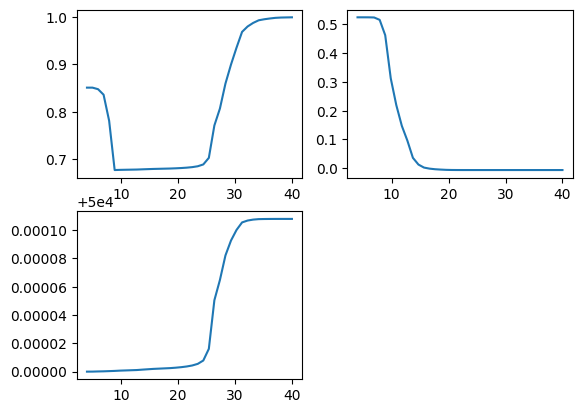

In [22]:
dim = V.y.shape[1]
# dim = 30
t = np.linspace(4,40,dim)
vz = V.y[0,0:dim]
vphi = V.y[1,0:dim]
bphi = V.y[2,0:dim]
plt.subplot(221)
plt.plot(t,vz)
plt.subplot(222)
plt.plot(t,vphi)
plt.subplot(223)
plt.plot(t,bphi)
# plt.plot(t,vz)
plt.show()

In [69]:
P1 = V
P1.y.shape

(3, 49)

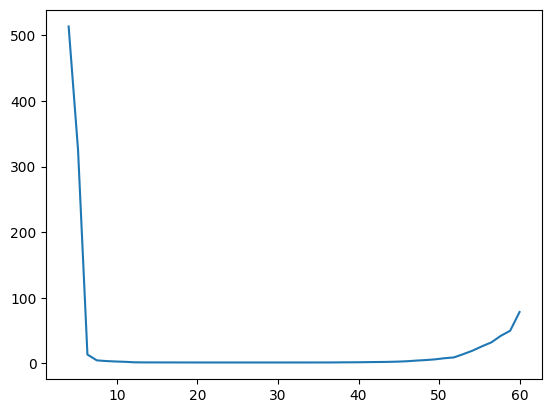

In [10]:

ga = 1./np.sqrt(1-(P1.y[0,:]**2 + P1.y[1,:]**2))
t = np.linspace(4,60,P1.y.shape[1])
plt.plot(t,ga)
plt.show()

In [17]:
np.all(ga == 0)

False

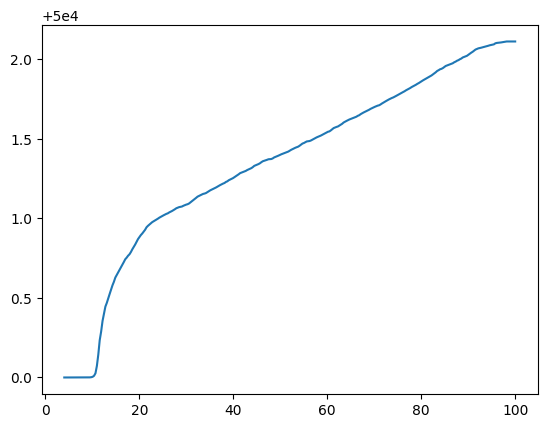

In [21]:
t = np.linspace(4,100,P2.y.shape[1])
plt.plot(t,P2.y[2,:])
plt.show()
# plt.plot(t,P1.y[0,0:dim],'b',label="Vr=-0.2")

In [15]:
np.all(P1.y[1,:]<0.1)

False

Text(0.5, 1.0, '$V_z - z $')

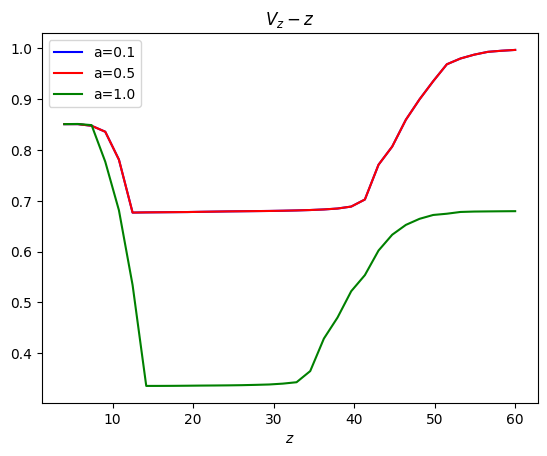

In [74]:
dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
# dim = 21
# t = np.linspace(4,100,50)
t = np.linspace(4,60,dim)
plt.plot(t,P1.y[0,0:dim],'b',label="a=0.1")
plt.plot(t,P2.y[0,0:dim],'r',label="a=0.5")
plt.plot(t,P3.y[0,0:dim],'g',label="a=1.0")
plt.legend()
plt.xlabel(r"$z$")
# plt.xlim(0,70)
# plt.xticks(np.arange(0,71,5))
# plt.ylabel(r"$V_r$")
# plt.ylabel(r"$V_ϕ$")
# plt.ylabel(r"$V_z$")
# plt.ylim(0.7,0.)
# plt.text(90,0.4,"B=4.7e4 \n Vz=0.75")
# plt.title(r"$V_r - r$")
# plt.title(r"$V_ϕ - r$")
plt.title(r"$V_z - z $")
# plt.show()


# plt.savefig("Vz_a")

Text(0.5, 1.0, '$V_ϕ - z$')

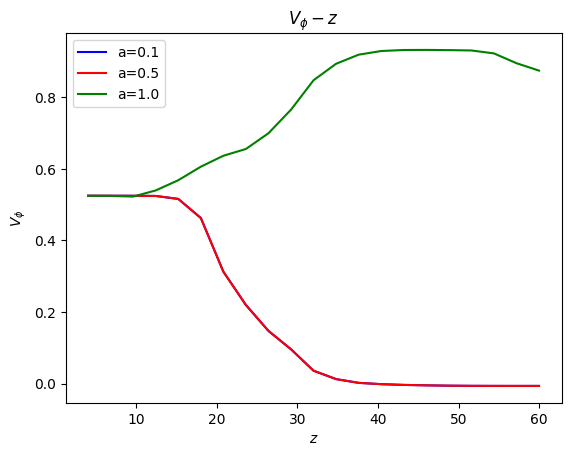

In [75]:
# dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim = 21
# t = np.linspace(4,100,50)
t = np.linspace(4,60,dim)
plt.plot(t,P1.y[1,0:dim],'b',label="a=0.1")
plt.plot(t,P2.y[1,0:dim],'r',label="a=0.5")
plt.plot(t,P3.y[1,0:dim],'g',label="a=1.0")
plt.legend()
plt.xlabel(r"$z$")
# plt.xlim(0,70)
# plt.xticks(np.arange(0,71,5))
plt.ylabel(r"$V_ϕ$")
# plt.ylim(0,0.45)
# plt.yticks(np.arange(0,0.46,0.05))
# plt.text(80,0.3,"B=4.7e4 \n Vz=0.75")
plt.title(r"$V_ϕ - z$")
# plt.show()
# plt.savefig("Vϕ_a")

Text(0.5, 1.0, '$B_ϕ - z$')

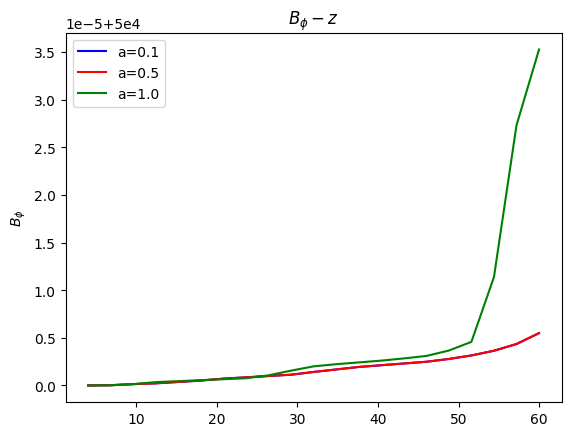

In [76]:
# dim = min(P1.y.shape[1], P2.y.shape[1], P3.y.shape[1])
dim = 21
# t = np.linspace(4,100,50)
t = np.linspace(4,60,dim)
plt.plot(t,P1.y[2,0:dim],'b',label="a=0.1")
plt.plot(t,P2.y[2,0:dim],'r',label="a=0.5")
plt.plot(t,P3.y[2,0:dim],'g',label="a=1.0")
plt.legend()
# plt.xlabel(r"$z$")
# plt.xlim(0,70)
# plt.xticks(np.arange(0,71,5))
plt.ylabel(r"$B_ϕ$")
# plt.ylim(0,0.45)
# plt.yticks(np.arange(0,0.46,0.05))
plt.title(r"$B_ϕ - z$")
# plt.text(90,50e3,"B=4.7e4 \n Vz=0.75")
# plt.show()
# plt.savefig("Bϕ_a")

In [20]:
np.any(P1.y[1,:]<0)

True

In [21]:
P1.y[1,:]

array([ 0.45      ,  0.6327878 ,  0.71507533, ..., -0.00189005,
       -0.00189008, -0.00189078])